In [1]:
import pandas as pd

In [3]:
raw_data = pd.read_csv('../Absenteeism_data.csv')

In [4]:
df = raw_data.copy()

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
# display(df) # You can use it to display all columns and all rows.
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


## Data Preprocessing

### ID

In [8]:
df = df.drop(['ID'], axis = 1)

### Reason for Absence

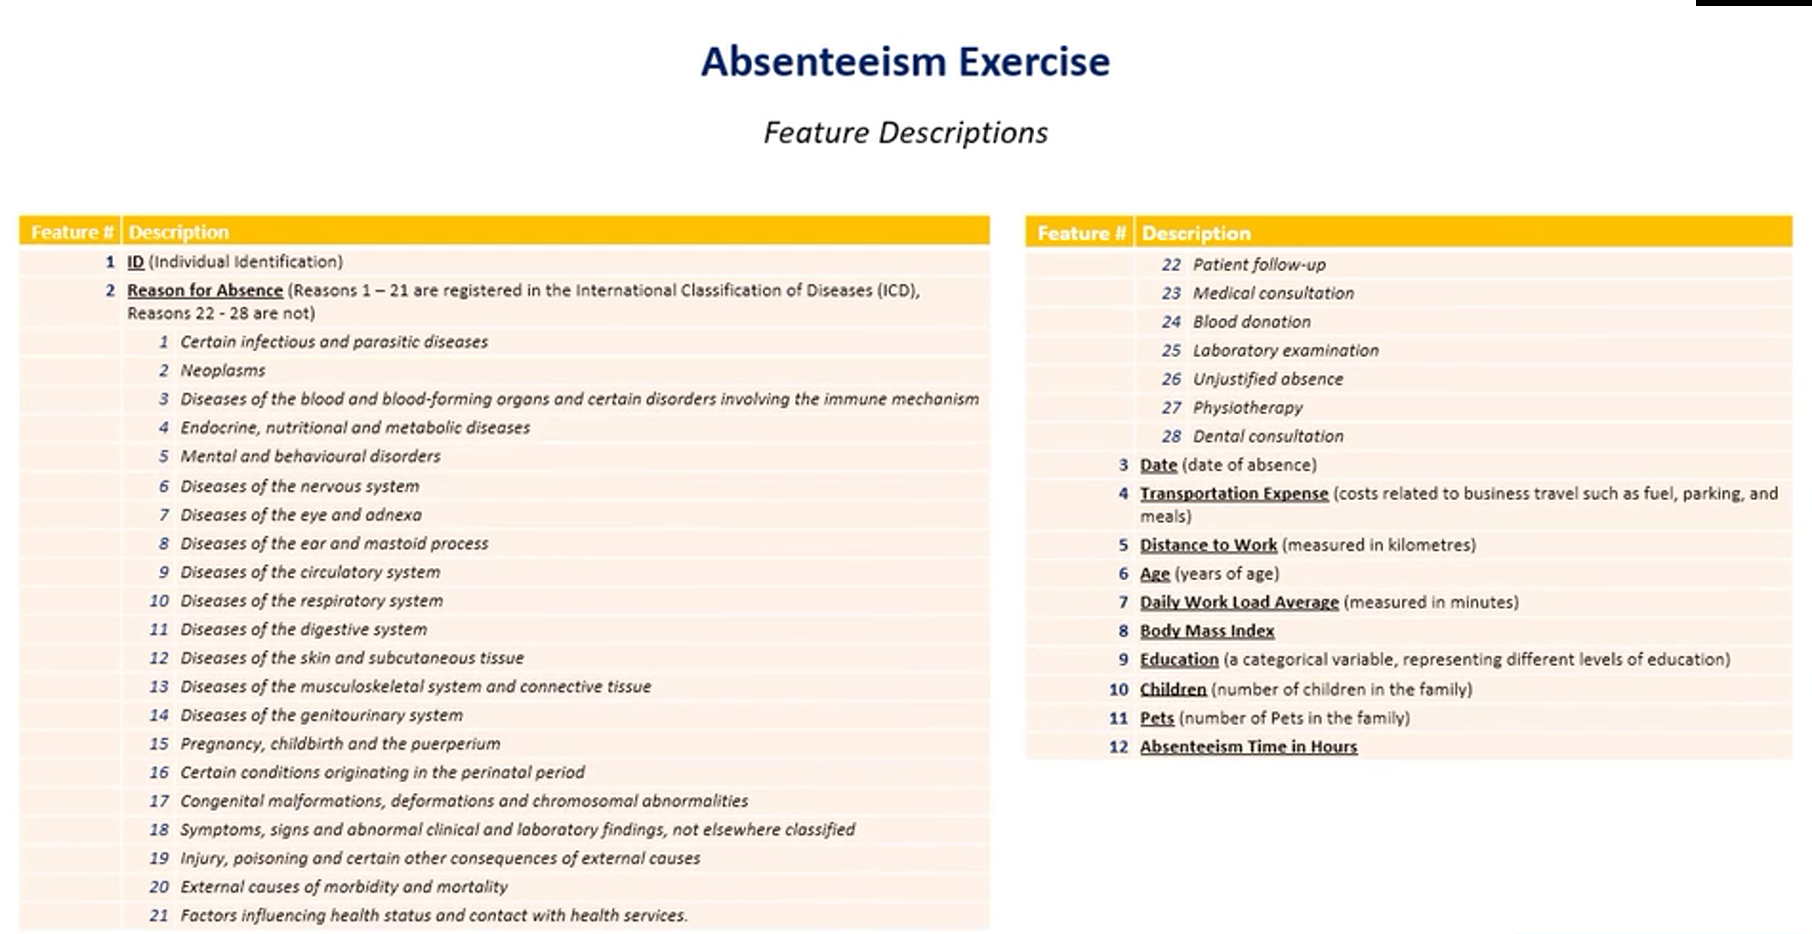

According to the picture above, there are so reasons to be absent. We can create the dummy variables each has a column(feature) in our dataset. This causes considerable feature increasing in our dataset and that's not what we want. So we group our features to reduce them.

In [9]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)

In [10]:
df = df.drop(['Reason for Absence'], axis = 1)

In [11]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis = 1) # various diseases
reason_type_2 = reason_columns.loc[:, 15:17].max(axis = 1) # pregnancy and giving birth
reason_type_3 = reason_columns.loc[:, 18:21].max(axis = 1) # poisoning
reason_type_4 = reason_columns.loc[:, 22:].max(axis = 1) # light diseases

In [12]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [13]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 
                'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [14]:
df.columns = column_names

In [15]:
column_names = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age', 
                 'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [16]:
df = df[column_names]

In [17]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Checkpoint

In [18]:
df_reason_mod = df.copy()

### Date

In [19]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')

In [20]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [21]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason_1                   700 non-null    uint8         
 1   Reason_2                   700 non-null    uint8         
 2   Reason_3                   700 non-null    uint8         
 3   Reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

In [22]:
def get_month(date_value):
    return date_value.month

In [23]:
df_reason_mod['Month Value'] = df_reason_mod['Date'].apply(get_month)

In [24]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [25]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [26]:
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)

In [27]:
column_names = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week', 'Transportation Expense', 'Distance to Work', 'Age', 
                 'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']

In [28]:
df_reason_mod = df_reason_mod[column_names]

In [29]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


### Checkpoint

In [30]:
df_reason_date_mod = df_reason_mod.copy()

### Education

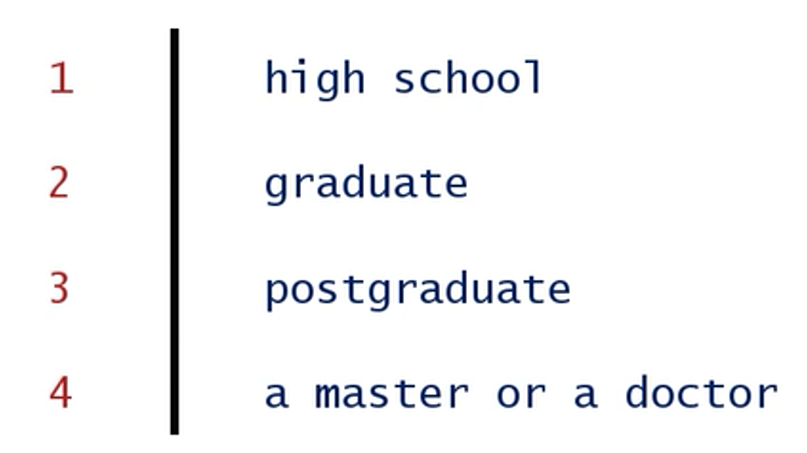

`Education` feature is also another categorical feature in our dataset. Similar to `Reason of Absence` feature, we reduce it to two classes: 

- 0: high school
- 1: graduate, postgraduate, a master or a doctor

In [31]:
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

### Final Checkpoint

In [32]:
df_preprocessed = df_reason_date_mod.copy()

In [33]:
# display(df_preprocessed)
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [73]:
df_preprocessed.to_parquet('Absenteeism_preprocessed.parquet.gzip', compression='gzip')